In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

<center>
    <img src="./assets/damper-spring-mass.png" height="200">
</center>

In [2]:
# Parâmetros do sistema
K = 10
M = 1
B = 1

In [3]:
# Função de transferência
tf = ct.tf([B, K], [M, B, K], name="Damper spring mass")
tf

TransferFunction(array([ 1, 10]), array([ 1,  1, 10]))

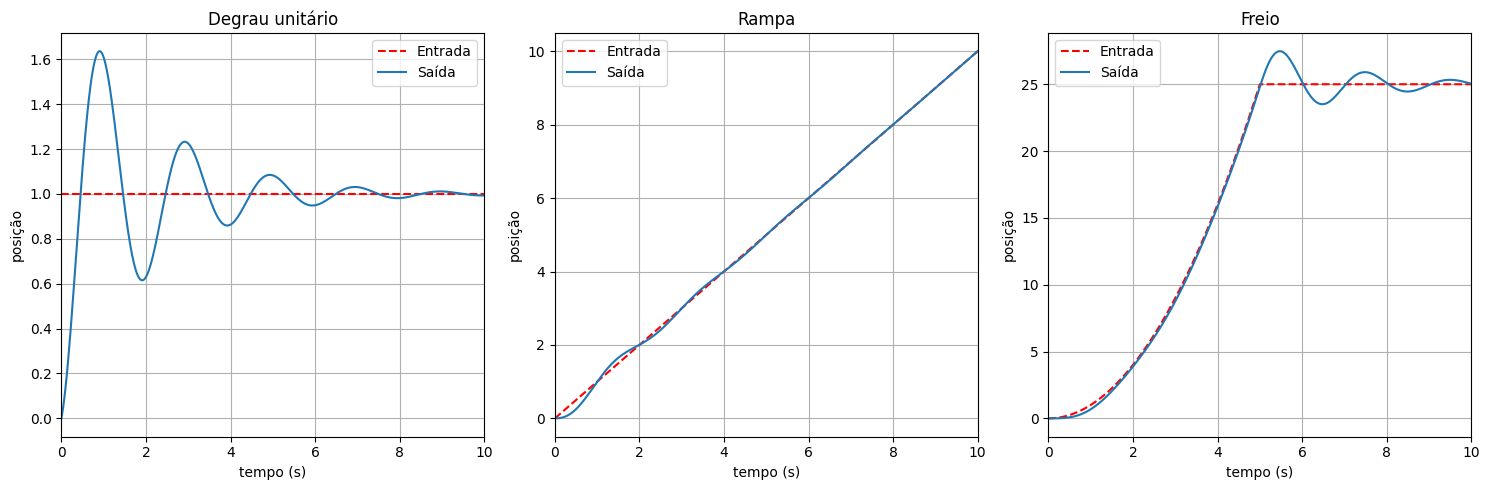

In [4]:
t = np.linspace(0, 10, 1000)

step = np.ones_like(t)
ramp = t
stop = np.piecewise(t, [t < 5, t >= 5], [lambda t: t**2, 25])

t1, step_response = ct.forced_response(tf, T=t, U=step)
t2, ramp_response = ct.forced_response(tf, T=t, U=ramp)
t3, stop_response = ct.forced_response(tf, T=t, U=stop)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(t, step, linestyle='--', color='red', label="Entrada")
ax1.plot(t1, step_response, label="Saída")
ax1.set_title('Degrau unitário')
ax1.set_xlabel('tempo (s)')
ax1.set_ylabel('posição')
ax1.legend()
ax1.set_xlim(0, 10)
ax1.grid()

ax2.plot(t, ramp, linestyle='--', color='red', label="Entrada")
ax2.plot(t2, ramp_response, label="Saída")
ax2.set_title('Rampa')
ax2.set_xlabel('tempo (s)')
ax2.set_ylabel('posição')
ax2.legend()
ax2.set_xlim(0, 10)
ax2.grid()

ax3.plot(t, stop, linestyle='--', color='red', label="Entrada")
ax3.plot(t3, stop_response, label="Saída")
ax3.set_title('Freio')
ax3.set_xlabel('tempo (s)')
ax3.set_ylabel('posição')
ax3.legend()
ax3.set_xlim(0, 10)
ax3.grid()

plt.tight_layout()
plt.show()

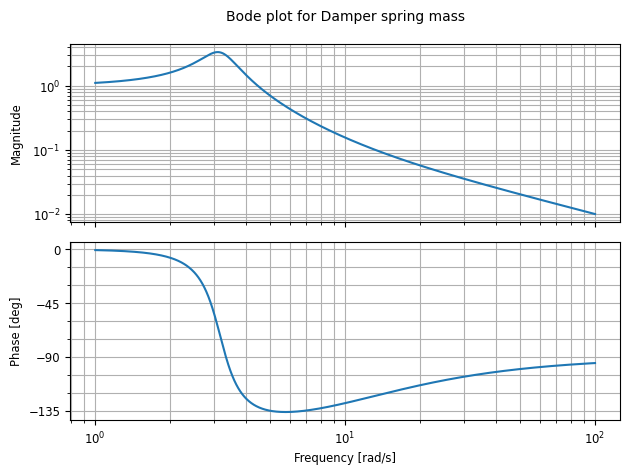

In [5]:
ct.frequency_response(tf).plot()

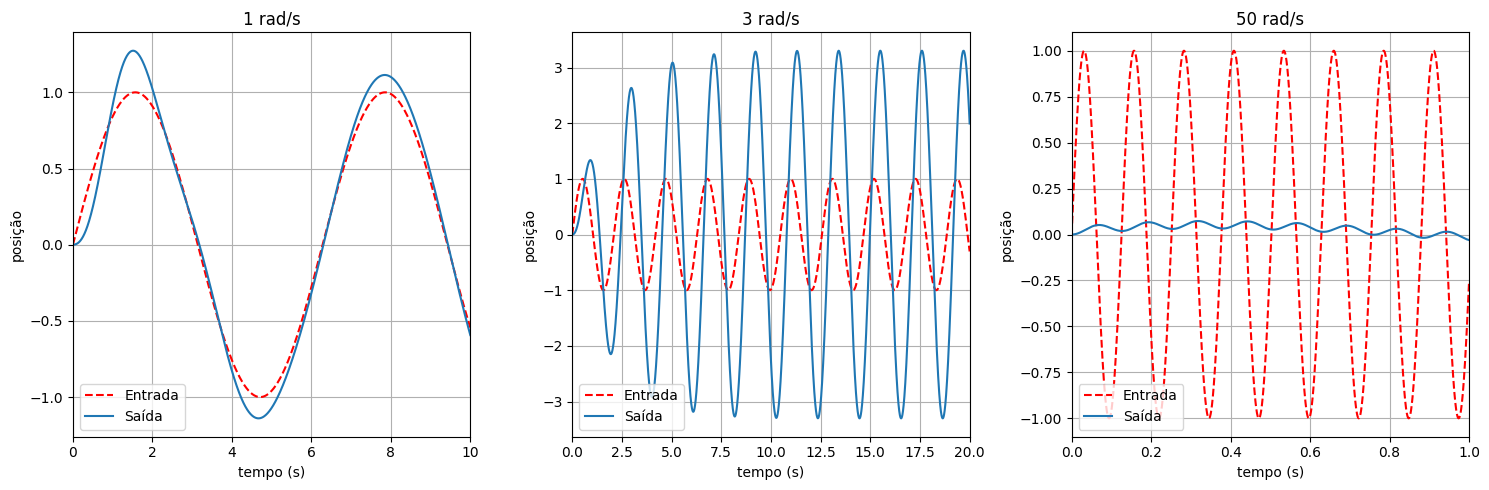

In [6]:
t = np.arange(0, 20, 1/5000)

w1_rad = 1
w2_rad = 3
w3_rad = 50

w1 = np.sin(t * w1_rad)
w2 = np.sin(t * w2_rad)
w3 = np.sin(t * w3_rad)

t1, w1_response = ct.forced_response(tf, T=t, U=w1)
t2, w2_response = ct.forced_response(tf, T=t, U=w2)
t3, w3_response = ct.forced_response(tf, T=t, U=w3)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(t, w1, linestyle='--', color='red', label="Entrada")
ax1.plot(t1, w1_response, label="Saída")
ax1.set_title(f'{w1_rad} rad/s')
ax1.set_xlabel('tempo (s)')
ax1.set_ylabel('posição')
ax1.legend()
ax1.set_xlim(0, 10)
ax1.grid()

ax2.plot(t, w2, linestyle='--', color='red', label="Entrada")
ax2.plot(t2, w2_response, label="Saída")
ax2.set_title(f'{w2_rad} rad/s')
ax2.set_xlabel('tempo (s)')
ax2.set_ylabel('posição')
ax2.legend()
ax2.set_xlim(0, 20)
ax2.grid()

ax3.plot(t, w3, linestyle='--', color='red', label="Entrada")
ax3.plot(t3, w3_response, label="Saída")
ax3.set_title(f'{w3_rad} rad/s')
ax3.set_xlabel('tempo (s)')
ax3.set_ylabel('posição')
ax3.legend()
ax3.set_xlim(0, 1)
ax3.grid()

plt.tight_layout()
plt.show()